In [35]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['STIXGeneral', 'DejaVu Serif'],
    'mathtext.fontset': 'stix',
    'font.size': 18,
    'axes.unicode_minus': True,
})

from astropy.coordinates import SkyCoord
import astropy.units as u

In [36]:
fname = 'dm-ne2001-30kpc.fits'
dm_map = hp.read_map(fname, nest=False)          # RING ordering by default

localizations = [
    '20h40m47.886s +72d52m56.378s',
    '08h58m52.92s  +73d29m27.0s',
    '21h12m10.760s +72d49m38.20s',
    '04h45m38.64s  +70d18m26.6s',
    '21h00m31.09s  +72d02m15.22s',
    '11h51m07.52s  +71d41m44.3s',
    '05h52m45.12s  +74d12m01.7s',
    '22h23m53.94s +73d01m33.26s',
    '20h20m08.92s +70d47m33.96s',
    '02h39m03.96s +71d01m04.3s',
    '20h50m28.59s +73d54m00.0s',
    '11h19m56.05s +70d40m34.4s'
]


sc = SkyCoord(localizations, unit=(u.hourangle, u.deg), frame="icrs")   # or 'fk5'
gal = sc.galactic        # has .l  and .b  Angle attributes



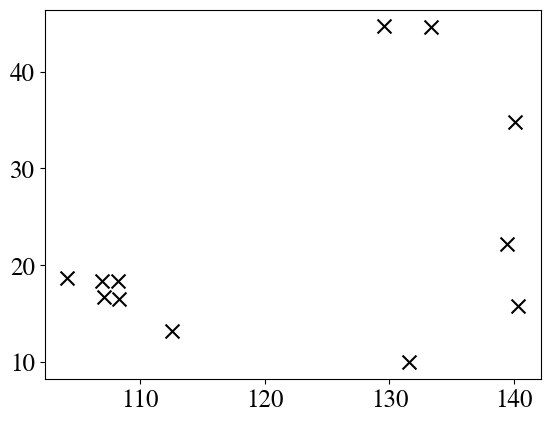

In [66]:
plt.scatter(gal.l.deg, gal.b.deg, s=100, c='k', marker='x', label='localizations')

TypeError: SphericalProjAxes.projtext() missing 1 required positional argument: 's'

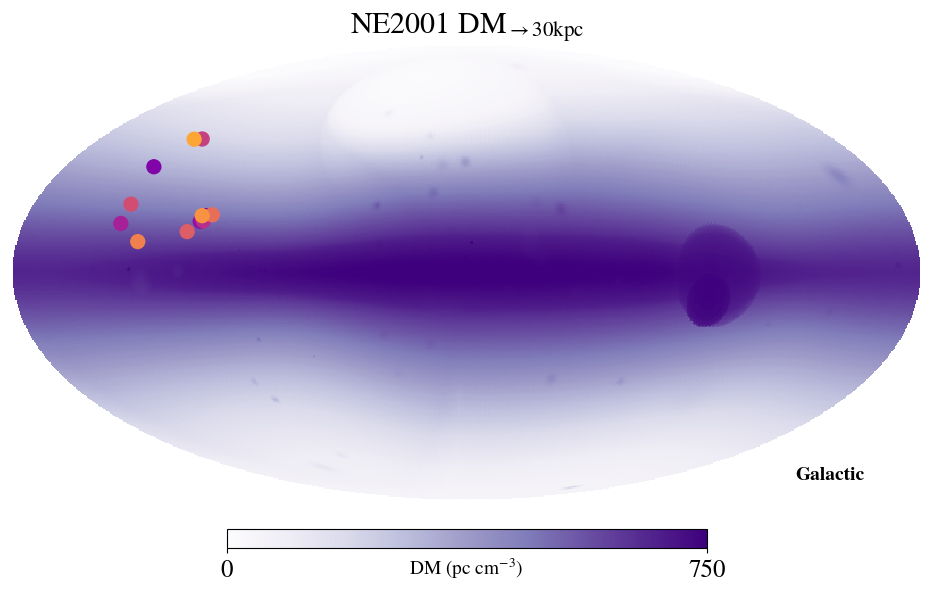

In [86]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['STIXGeneral', 'DejaVu Serif'],
    'mathtext.fontset': 'stix',
    'font.size': 18,
    'axes.unicode_minus': True,
})

hp.mollview(
    dm_map,                # map is in Galactic coords
    coord=["G"],           # map is in Galactic coords
    unit=r"DM (pc cm$^{-3}$)",
    cmap='Purples',        # choose a colormap
    norm='hist',
    title="NE2001 DM" + r"$_{\rightarrow \mathrm{30 kpc}}$",
    min=0, max=750,        # tweak colour scale as you wish
    fig=plt.figure(figsize=(10, 6))  # make the figure really big
)

#hp.graticule()
colors = plt.get_cmap('plasma')(np.linspace(0.2, 0.8, 12))
hp.projscatter(gal.l.deg, gal.b.deg, lonlat=True,
               c=colors, s=100)

def annotate_coords(skycoord, **text_kw):
    """Write HMS/DMS labels next to every SkyCoord in the current healpy proj."""
    gal = skycoord.galactic
    for lon, lat, lab in zip(gal.l.deg, gal.b.deg,
                             [c.to_string('hmsdms', precision=0) for c in skycoord]):
        hp.projtext(lon, lat, lab, lonlat=True)


lab = names = np.array([
    'z', 'wh', 'o', 'isha', 'wi', 'p',
    'f', 'j', 'h', 'm', 'ch', 'ca'
])
# add labels one-by-one
for lon, lat in zip(gal.l.deg, gal.b.deg):
    hp.projtext(lon, lat,lonlat=True,
                fontsize=12, va='bottom', ha='left')

#plt.legend()


plt.show()

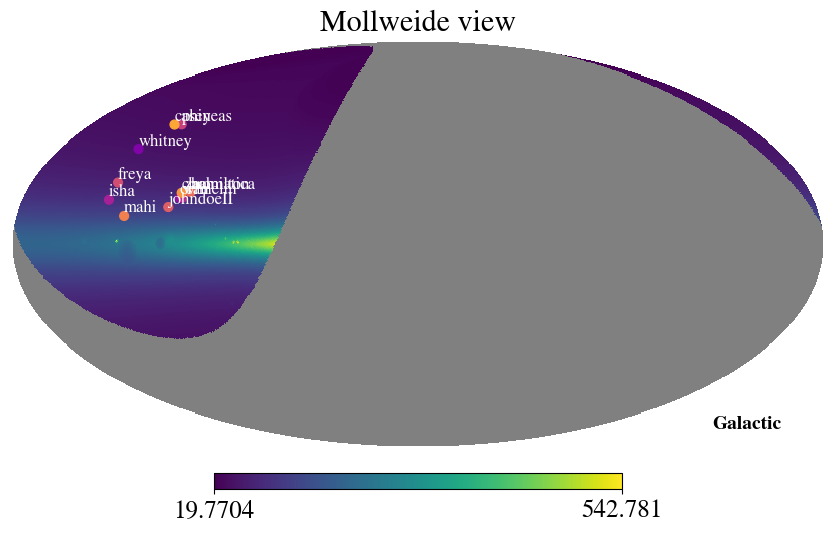

In [ ]:
lon0, lat0 = 25, 120              # centre (deg)
radius     = 1500 * u.deg           # radius of disc
vec0     = hp.ang2vec(lat0, lon0, lonlat=True)
disc_pix = hp.query_disc(nside, vec0, np.radians(radius.to_value(u.deg)))
masked   = hp.ma(dm_map)
masked.mask = True
masked.mask[disc_pix] = False
hp.mollview(masked, coord=['G'])
#hp.graticule()
colors = plt.get_cmap('plasma')(np.linspace(0.2, 0.8, 12))
hp.projscatter(gal.l.deg, gal.b.deg, lonlat=True,
               c=colors, s=40)

def annotate_coords(skycoord, **text_kw):
    """Write HMS/DMS labels next to every SkyCoord in the current healpy proj."""
    gal = skycoord.galactic
    for lon, lat, lab in zip(gal.l.deg, gal.b.deg,
                             [c.to_string('hmsdms', precision=0) for c in skycoord]):
        hp.projtext(lon, lat, lab, lonlat=True, )


lab = names = np.array([
    'zach', 'whitney', 'oran', 'isha', 'wilhelm', 'phineas',
    'freya', 'johndoeII', 'hamilton', 'mahi', 'chromatica', 'casey'
])
# add labels one-by-one
for lon, lat, lab in zip(gal.l.deg, gal.b.deg, lab):
    hp.projtext(lon, lat, lab, lonlat=True,
                fontsize=12, color='white', va='bottom', ha='left')

#plt.legend()

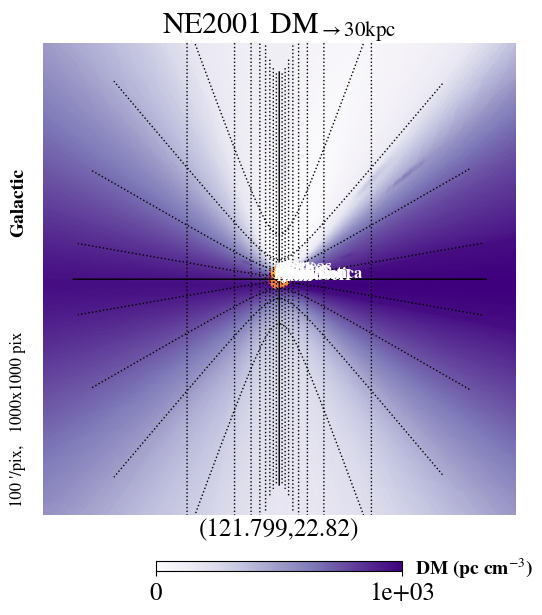

In [76]:
# 1. Calculate the center of your cluster to aim the view
center_lon = np.mean(gal.l.deg)
center_lat = np.mean(gal.b.deg)

# 2. Create the zoomed-in gnomonic projection
hp.gnomview(
    dm_map,
    coord=["G"],
    rot=(center_lon, center_lat, 0), # Center the view on your cluster
    xsize=1000,                      # Tweak image size
    reso=100,                          # Tweak zoom level (arcmin/pixel)
    unit=r"DM (pc cm$^{-3}$)",
    cmap='Purples',
    norm='hist',
    title="NE2001 DM" + r"$_{\rightarrow \mathrm{30 kpc}}$",
    min=0, max=1000
)

# This adds a map scale bar, very useful for gnomview
hp.graticule()

# 3. Scatter and label your points (this code does not need to change)
colors = plt.get_cmap('plasma')(np.linspace(0.2, 0.8, len(names)))
hp.projscatter(gal.l.deg, gal.b.deg, lonlat=True,
               c=colors, s=60) # Increased size for better visibility

# Add labels one-by-one
for lon, lat, lab in zip(gal.l.deg, gal.b.deg, names):
    hp.projtext(lon, lat, lab, lonlat=True,
                fontsize=12, color='white', va='bottom', ha='left',
                fontweight='bold')


plt.show()
  